Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.96      0.98        27

    accuracy                           0.99        90
   macro avg       0.99      0.98      0.99        90
weighted avg       0.99      0.99      0.99        90



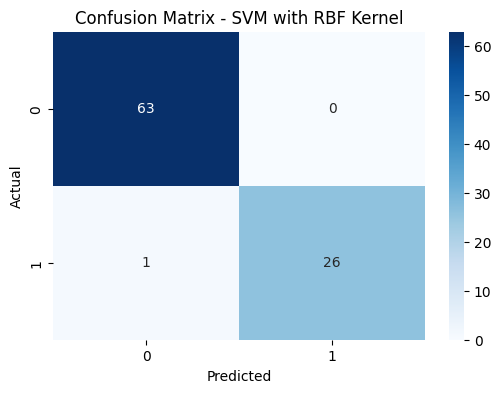

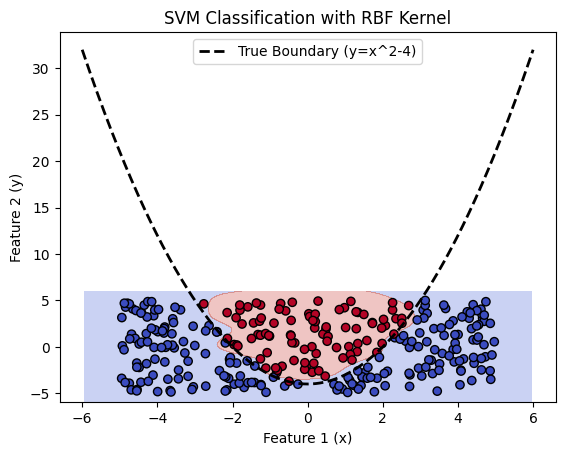

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

np.random.seed(42)
X = np.random.uniform(-5, 5, (300, 2))
y = (X[:,1] > (X[:,0]**2 - 4)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='rbf', gamma='auto', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - SVM with RBF Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 800),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 800))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
x_curve = np.linspace(-6, 6, 800)
y_curve = x_curve**2 - 4
plt.plot(x_curve, y_curve, 'k--', linewidth=2, label="True Boundary (y=x^2-4)")

plt.title("SVM Classification with RBF Kernel")
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.legend()
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       120
           1       0.78      0.83      0.81        30

    accuracy                           0.92       150
   macro avg       0.87      0.89      0.88       150
weighted avg       0.92      0.92      0.92       150



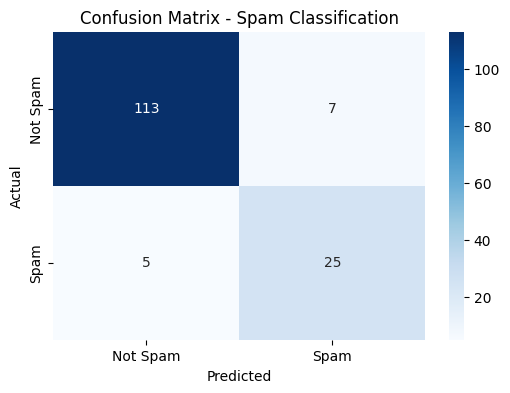

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


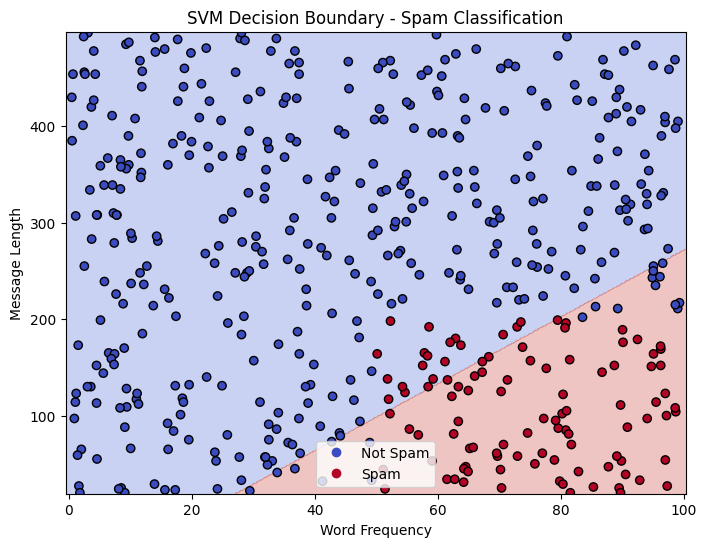

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 500

word_freq = np.random.rand(n_samples) * 100
msg_length = np.random.randint(20, 500, size=n_samples)
labels = ((word_freq > 50) & (msg_length < 200)).astype(int)

data = pd.DataFrame({"word_freq": word_freq, "msg_length": msg_length, "spam": labels})

X = data[['word_freq', 'msg_length']]
y = data['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap="Blues",
           xticklabels=["Not Spam","Spam"],
           yticklabels=["Not Spam","Spam"])
plt.title("Confusion Matrix - Spam Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(8,6))
x_min, x_max = X['word_freq'].min() - 1, X['word_freq'].max() + 1
y_min, y_max = X['msg_length'].min() - 1, X['msg_length'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X['word_freq'], X['msg_length'], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Word Frequency")
plt.ylabel("Message Length")
plt.title("SVM Decision Boundary - Spam Classification")
plt.legend(handles=scatter.legend_elements()[0], labels=["Not Spam", "Spam"])
plt.show()
